In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. 데이터 불러오기
df = pd.read_csv('/Users/beok/Project/LLM_effection/regression/breast cancer.csv')

# 2. 데이터 전처리
# 분석에 불필요한 id와 결측치만 있는 Unnamed: 32 컬럼 제거
df = df.drop(columns=['id', 'Unnamed: 32'])

# 종속 변수(diagnosis) 인코딩: Malignant(악성) -> 1, Benign(양성) -> 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 3. 독립 변수(X)와 종속 변수(y) 설정
y = df['diagnosis']
X = df.drop(columns=['diagnosis'])

# 4. 피처 스케일링 (변수들의 단위가 다르므로 표준화 수행)
# 로지스틱 회귀 모델의 수렴 속도와 정확도를 위해 권장됩니다.
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 5. 상수항(Intercept) 추가
# statsmodels는 기본적으로 상수항을 포함하지 않으므로 추가해줘야 합니다.
X_scaled = sm.add_constant(X_scaled)

# 6. 로지스틱 회귀 모델 생성 및 학습
# 'bfgs' 최적화 방식을 사용하여 수렴 안정성을 높였습니다.
logit_model = sm.Logit(y, X_scaled)
results = logit_model.fit(method='bfgs', maxiter=100)

# 7. 결과 요약 출력
print(results.summary())


         Current function value: 0.036267
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      538
Method:                           MLE   Df Model:                           30
Date:                Sat, 03 Jan 2026   Pseudo R-squ.:                  0.9451
Time:                        15:07:31   Log-Likelihood:                -20.636
converged:                      False   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                3.720e-130
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.3297      2.664  

/Users/beok/miniforge3/envs/crawling/lib/python3.11/site-packages/scipy/optimize/_optimize.py:1313: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Users/beok/miniforge3/envs/crawling/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [3]:

# 8. (선택) 오즈비(Odds Ratio) 확인
# 회귀계수에 exp를 취하여 독립변수가 1단위 증가할 때 악성 확률이 몇 배 증가하는지 확인
print("\n[오즈비(Odds Ratio)]")
print(np.exp(results.params))


[오즈비(Odds Ratio)]
const                        3.779892
radius_mean                  0.203093
texture_mean                 0.191929
perimeter_mean               0.197850
area_mean                    0.413704
smoothness_mean              2.944283
compactness_mean             0.004811
concavity_mean              34.636096
concave points_mean         76.596799
symmetry_mean                0.529472
fractal_dimension_mean       1.428128
radius_se                  157.366119
texture_se                   0.079812
perimeter_se                 0.524510
area_se                    148.277289
smoothness_se                4.111547
compactness_se               2.010665
concavity_se                 0.081431
concave points_se            7.442092
symmetry_se                  0.654810
fractal_dimension_se         0.016174
radius_worst                42.660205
texture_worst              380.747261
perimeter_worst              7.326705
area_worst                  69.699678
smoothness_worst             0.

## 상관분석 

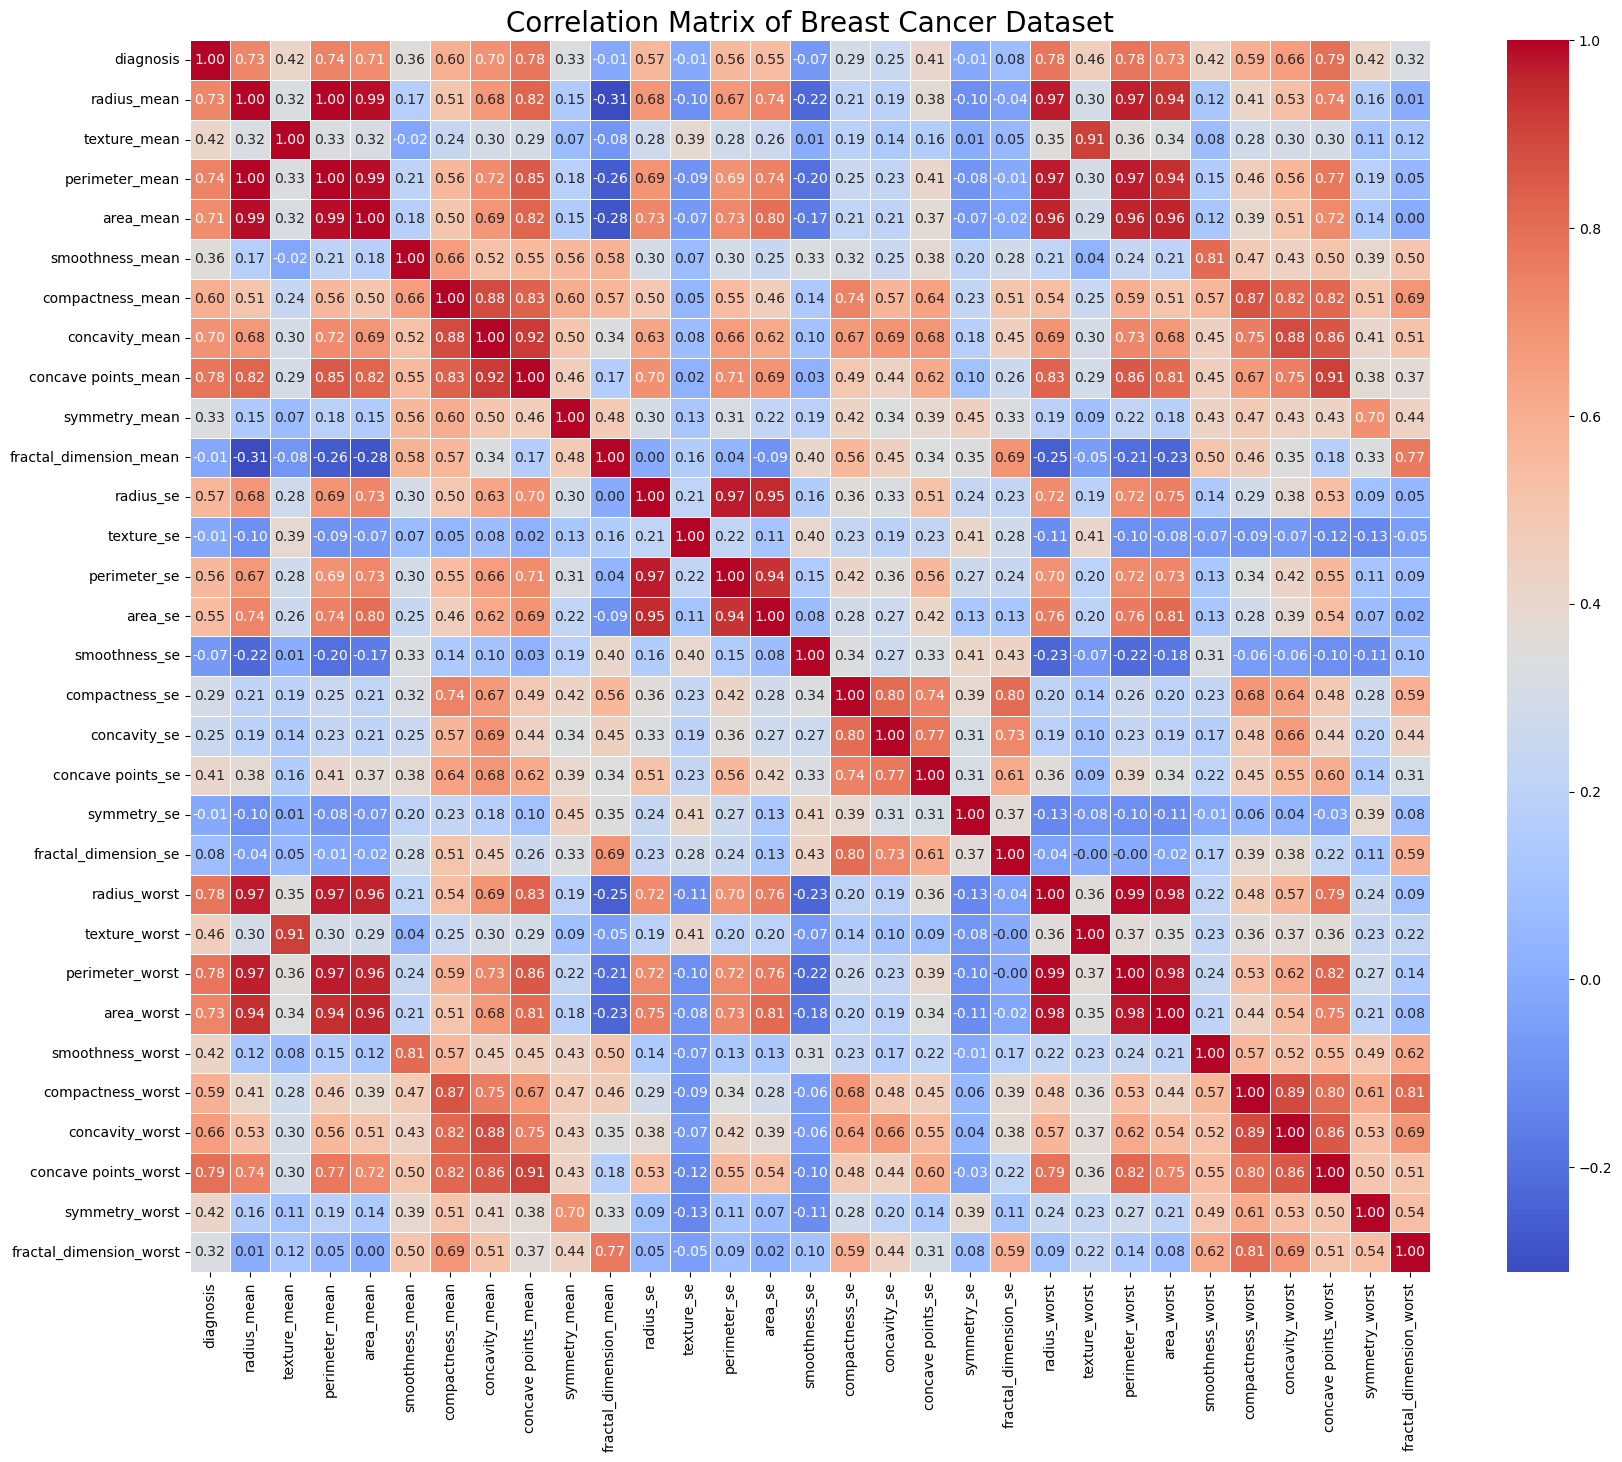

--- [diagnosis와 상관관계가 높은 주요 변수] ---
diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv('breast cancer.csv')

# 2. 데이터 전처리
# 분석에 불필요한 'id'와 전체가 결측치인 'Unnamed: 32' 컬럼 제거
df = df.drop(columns=['id', 'Unnamed: 32'])

# 범주형 변수(diagnosis)를 상관분석에 포함하기 위해 수치형으로 변환 (M: 1, B: 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 3. 상관계수 행렬 계산 (피어슨 상관계수 기본값)
corr_matrix = df.corr()

# 4. 시각화 (Heatmap)
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Breast Cancer Dataset', fontsize=20)
plt.show()

# 5. 특정 변수(예: diagnosis)와 상관관계가 높은 변수 확인
print("--- [diagnosis와 상관관계가 높은 주요 변수] ---")
top_correlations = corr_matrix['diagnosis'].sort_values(ascending=False)
print(top_correlations.head(11)) # 자기 자신 포함 상위 10개 출력

In [6]:
# 2. 전처리: 불필요한 컬럼 제거 및 독립변수(X) 설정
# id, Unnamed: 32 그리고 종속변수인 diagnosis 제거
X = df
# 3. 높은 상관관계를 보이는 변수쌍 찾기 (기준: 0.9 이상)
corr_matrix = X.corr().abs()
# 중복 제거를 위해 상삼각행렬만 추출
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 상관관계가 0.9 이상인 변수쌍 추출
high_corr_pairs = [(column, row) for column in upper.columns for row in upper.index if upper.loc[row, column] > 0.9]

print("--- [상관관계가 0.9 이상인 주요 변수쌍] ---")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.4f}")

--- [상관관계가 0.9 이상인 주요 변수쌍] ---
perimeter_mean - radius_mean: 0.9979
area_mean - radius_mean: 0.9874
area_mean - perimeter_mean: 0.9865
concave points_mean - concavity_mean: 0.9214
perimeter_se - radius_se: 0.9728
area_se - radius_se: 0.9518
area_se - perimeter_se: 0.9377
radius_worst - radius_mean: 0.9695
radius_worst - perimeter_mean: 0.9695
radius_worst - area_mean: 0.9627
texture_worst - texture_mean: 0.9120
perimeter_worst - radius_mean: 0.9651
perimeter_worst - perimeter_mean: 0.9704
perimeter_worst - area_mean: 0.9591
perimeter_worst - radius_worst: 0.9937
area_worst - radius_mean: 0.9411
area_worst - perimeter_mean: 0.9415
area_worst - area_mean: 0.9592
area_worst - radius_worst: 0.9840
area_worst - perimeter_worst: 0.9776
concave points_worst - concave points_mean: 0.9102


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 4. VIF(다중공선성) 점수 계산
# statsmodels의 VIF 계산은 상수항(Intercept)이 포함된 상태를 기준으로 합니다.
X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(len(X_with_const.columns))]

# 결과 출력 (상수항 제외하고 VIF 높은 순으로 정렬)
print("\n--- [다중공선성(VIF) 결과] ---")
print(vif_data[vif_data['Feature'] != 'const'].sort_values(by="VIF", ascending=False))


--- [다중공선성(VIF) 결과] ---
                    Feature          VIF
2               radius_mean  3817.259795
4            perimeter_mean  3792.697001
22             radius_worst   815.945630
24          perimeter_worst   405.150023
5                 area_mean   348.115385
25               area_worst   343.494355
12                radius_se    75.737325
8            concavity_mean    71.002747
14             perimeter_se    70.398925
9       concave points_mean    60.172431
7          compactness_mean    51.445960
15                  area_se    41.196467
27        compactness_worst    36.984867
29     concave points_worst    36.781339
28          concavity_worst    32.090394
31  fractal_dimension_worst    18.975850
23            texture_worst    18.606605
18             concavity_se    15.914022
11   fractal_dimension_mean    15.756978
17           compactness_se    15.366350
3              texture_mean    11.891280
19        concave points_se    11.601253
26         smoothness_worst    1

### 상관계수가 높은 변수들 제거 후, 다시 다중공선성 확인

In [ ]:
# 2. 고상관 변수 제거 함수 정의
def filter_high_correlation(df, threshold=0.8):
    # 상관계수 행렬의 절대값 계산
    corr_matrix = df.corr().abs()
    # 상삼각행렬(Upper triangle)만 추출하여 자기 자신과의 상관관계 및 중복 방지
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # 임계값(0.8) 이상인 상관관계를 가진 컬럼 식별
    to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]
    return to_drop

# 상관계수 0.8 이상인 변수 제거 수행
dropped_vars = filter_high_correlation(X, threshold=0.8)
print(dropped_vars)



['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


In [10]:
X_reduced = X.drop(columns=dropped_vars)

print(f"--- [변수 정제 결과] ---")
print(f"제거된 변수 ({len(dropped_vars)}개): {dropped_vars}")
print(f"남은 변수 ({len(X_reduced.columns)}개): {list(X_reduced.columns)}")

--- [변수 정제 결과] ---
제거된 변수 (17개): ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']
남은 변수 (14개): ['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se', 'symmetry_worst']


In [11]:
# 3. 정제된 변수들에 대해 다중공선성(VIF) 재검사 함수 정의
def calculate_vif(data):
    # VIF 계산을 위해 상수항(const) 추가
    data_with_const = sm.add_constant(data)
    vif_df = pd.DataFrame()
    vif_df["Feature"] = data_with_const.columns
    vif_df["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(len(data_with_const.columns))]
    # 상수항은 결과에서 제외하고 VIF 높은 순으로 정렬
    return vif_df[vif_df['Feature'] != 'const'].sort_values(by="VIF", ascending=False)

vif_results = calculate_vif(X_reduced)

print("\n--- [정제 후 다중공선성(VIF) 결과] ---")
print(vif_results)


--- [정제 후 다중공선성(VIF) 결과] ---
                   Feature        VIF
5         compactness_mean  12.332260
2              radius_mean   7.511013
7   fractal_dimension_mean   5.682199
11          compactness_se   5.474746
14          symmetry_worst   4.159328
1                diagnosis   3.452885
4          smoothness_mean   3.412395
12       concave points_se   3.121472
6            symmetry_mean   3.121014
8                radius_se   2.999664
13             symmetry_se   2.530197
10           smoothness_se   2.071872
9               texture_se   2.044112
3             texture_mean   1.766841


In [18]:
# VIF가 10 초과인 변수 제거
X_reduced_v2 = X_reduced.drop(columns=['compactness_mean'])

# 다시 VIF 계산
vif_results_v2 = calculate_vif(X_reduced_v2)

print("\n--- [VIF 재계산 결과 (compactness_mean 제거 후)] ---")
print(vif_results_v2)


--- [VIF 재계산 결과 (compactness_mean 제거 후)] ---
                   Feature       VIF
1              radius_mean  4.330572
5   fractal_dimension_mean  3.993776
9           compactness_se  3.780976
12          symmetry_worst  3.431125
10       concave points_se  3.045192
4            symmetry_mean  2.998866
6                radius_se  2.925301
3          smoothness_mean  2.756088
11             symmetry_se  2.361566
7               texture_se  2.017640
8            smoothness_se  1.962016
2             texture_mean  1.635350


In [19]:
# 4. 피처 스케일링 (로지스틱 회귀 모델의 안정적인 수렴을 위해 수행)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_reduced_v2), columns=X_reduced_v2.columns)

# 5. 상수항 추가 (Intercept)
X_scaled = sm.add_constant(X_scaled)

# 6. 최종 로지스틱 회귀 모델 생성 및 학습
logit_model = sm.Logit(y, X_scaled)
results = logit_model.fit(method='bfgs', maxiter=100)

# 7. 결과 요약 출력
print("--- [최종 로지스틱 회귀 분석 결과 요약] ---")
print(results.summary())

# 8. 변수별 영향력 확인 (오즈비 계산)
print("\n--- [변수별 오즈비(Odds Ratio)] ---")
odds_ratios = np.exp(results.params)
print(odds_ratios.sort_values(ascending=False))

Optimization terminated successfully.
         Current function value: 0.087544
         Iterations: 90
         Function evaluations: 91
         Gradient evaluations: 91
--- [최종 로지스틱 회귀 분석 결과 요약] ---
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      556
Method:                           MLE   Df Model:                           12
Date:                Mon, 05 Jan 2026   Pseudo R-squ.:                  0.8674
Time:                        23:38:46   Log-Likelihood:                -49.812
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                8.975e-132
                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

In [15]:
# 1. 데이터 불러오기 및 기초 전처리
df = pd.read_csv('breast cancer.csv')
df = df.drop(columns=['id', 'Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 2. 독립변수(X)와 종속변수(y) 설정
y = df['diagnosis']
X = df.drop(columns=['diagnosis'])

# 3. 고상관 변수 제거 로직 (이전 단계에서 검증된 0.8 기준 적용)
def filter_high_correlation(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]
    return to_drop

dropped_vars = filter_high_correlation(X, threshold=0.8)
X_reduced = X.drop(columns=dropped_vars)

In [20]:
# fit_regularized를 사용하여 Lasso 규제 적용
# L1_wt=1.0은 Lasso, alpha는 규제 강도 (높을수록 변수를 더 많이 제거)
regularized_results = logit_model.fit_regularized(method='l1', alpha=1.0)

print(regularized_results.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.11918852024227408
            Iterations: 113
            Function evaluations: 113
            Gradient evaluations: 113
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      558
Method:                           MLE   Df Model:                           10
Date:                Mon, 05 Jan 2026   Pseudo R-squ.:                  0.8595
Time:                        23:45:32   Log-Likelihood:                -52.782
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.579e-132
                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------